In [1]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import train_test_split. Crossval score. Gridsearch CV
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

# Import Standard Scaller
from sklearn.preprocessing import StandardScaler


# Import logistic regression. KNN.
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# Import metrics
from sklearn import metrics

#Import Pipeline
from sklearn.pipeline import Pipeline

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer


# imports

from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier



from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, plot_confusion_matrix


# Import CountVectorizer and TFIDFVectorizer from feature_extraction.text.
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [2]:
df = pd.read_csv('./data/stemtext_count_sentiment.csv')

# Model - Count Vectorizer!

In [3]:
# Step 1: Split into training & testing sets
X = df['features']
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=13)

In [4]:
X_train.shape

(1494,)

In [5]:
y_test.value_counts(normalize = True)

0    0.503006
1    0.496994
Name: target, dtype: float64

In [6]:
# Instantiate a CountVectorizer.
cvec = CountVectorizer()

In [7]:
# Fit the vectorizer on our corpus.
cvec.fit(X_train)

CountVectorizer()

In [8]:
# Transform the corpus.
X_train = cvec.transform(X_train)

In [9]:
X_test = cvec.transform(X_test)

In [10]:
X_train.shape

(1494, 9268)

<AxesSubplot:>

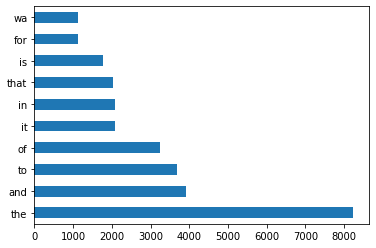

In [11]:
# Convert X_train into a DataFrame.
# We will not actually use this for modeling,
# this is just to visualize what is happening
X_train_df = pd.DataFrame(X_train.todense(), 
                          columns=cvec.get_feature_names())

# plot top occuring words
X_train_df.sum().sort_values(ascending = False).head(10).plot(kind= 'barh')

In [12]:
# Let's look at sklearn's stopwords.
print(CountVectorizer(stop_words = 'english').get_stop_words())

frozenset({'always', 'these', 'on', 'thus', 'amongst', 'if', 'full', 'back', 'wherever', 'been', 'seem', 'interest', 'serious', 'eg', 'were', 'anyhow', 'six', 'after', 'also', 'how', 'everything', 'many', 'because', 'cry', 'over', 'it', 'again', 'whereas', 'nothing', 'part', 'themselves', 'perhaps', 'former', 'put', 'or', 'could', 'a', 'itself', 'etc', 'his', 'same', 'an', 'hereupon', 'nor', 'the', 'too', 'where', 'please', 'thereby', 'them', 'go', 'who', 'herein', 'during', 'one', 'fill', 'yourself', 'front', 'before', 'per', 'was', 'fifteen', 'indeed', 'mostly', 'due', 'four', 'will', 'nowhere', 'may', 'ourselves', 'there', 'myself', 'anyway', 'another', 'only', 'whereafter', 'ever', 'within', 'be', 'almost', 'whatever', 'against', 'well', 'as', 'twenty', 'hundred', 'else', 'found', 'together', 'around', 'therein', 'become', 'top', 'can', 'much', 'two', 'whether', 'between', 'nobody', 'their', 'everywhere', 'name', 'what', 'third', 'somewhere', 'and', 'take', 'further', 'un', 'along'

In [14]:
# Redefine training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    stratify=y,
                                                    random_state=13)

In [15]:
y_test.value_counts(normalize = True)

1    0.501002
0    0.498998
Name: target, dtype: float64

In [16]:
X_train.shape

(1494,)

In [17]:
# Let's set a pipeline up with two stages:
# 1. CountVectorizer (transformer)
# 2. Multinomial Naive Bayes (estimator)

pipe = Pipeline([
    ('cvec', CountVectorizer()),
    ('nb', MultinomialNB())
])



In [18]:
# Search over the following values of hyperparameters:
# Maximum number of features fit: 2000, 3000, 4000, 5000
# Minimum number of documents needed to include token: 2, 3
# Maximum number of documents needed to include token: 90%, 95%
# Check (individual tokens) and also check (individual tokens and 2-grams).

pipe_params = {
    'cvec__max_features':[2000, 3000, 4000, 5000],
    'cvec__min_df' : [2, 3],
    'cvec__max_df': [.9, .95],
    'cvec__ngram_range': [(1, 1), (1, 2)]
}

In [19]:
# Instantiate GridSearchCV.

gs_cv = GridSearchCV(pipe, # what object are we optimizing?
                  pipe_params, # what parameters values are we searching?
                  cv = 5) # 5-fold cross-validation.

In [20]:
X_train.shape

(1494,)

In [21]:
# Fit GridSearch to training data.
gs_cv.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('cvec', CountVectorizer()),
                                       ('nb', MultinomialNB())]),
             param_grid={'cvec__max_df': [0.9, 0.95],
                         'cvec__max_features': [2000, 3000, 4000, 5000],
                         'cvec__min_df': [2, 3],
                         'cvec__ngram_range': [(1, 1), (1, 2)]})

In [22]:
# What's the best score?
gs_cv.best_score_

0.729588561423986

In [52]:
gs_cv.best_params_

{'cvec__max_df': 0.9,
 'cvec__max_features': 2000,
 'cvec__min_df': 3,
 'cvec__ngram_range': (1, 1)}

In [23]:
# Score model on training set.
gs_cv.score(X_train, y_train)

0.822623828647925

In [24]:
# Score model on testing set.
gs_cv.score(X_test, y_test)

0.7394789579158316

In [25]:
# Get predictions
preds = gs_cv.predict(X_test)

# Save confusion matrix values
tn, fp, fn, tp = confusion_matrix(y_test, preds).ravel()


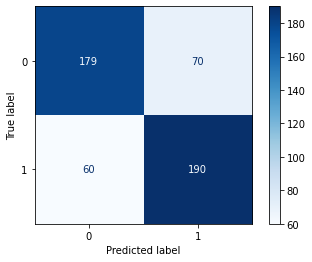

In [26]:
# View confusion matrix
plot_confusion_matrix(gs_cv, X_test, y_test, cmap='Blues', values_format='d');

In [28]:
# Calculate the specificity
tn / (tn + fp) # there are 5 real emails that got tagged as spam - that's bad! can we bring this to 0?

0.7188755020080321

In [29]:
179/(179+70)

0.7188755020080321

# Model - TFIDF + Naive Bayes!

In [53]:
# Instantiate the transformer.
tvec = TfidfVectorizer()

In [54]:
# Step 1: Split into training & testing sets
X = df['features']
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=13)

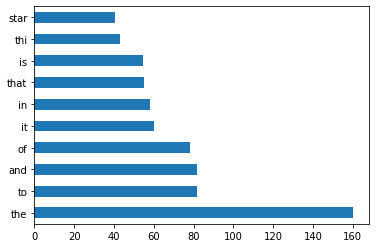

In [55]:
# convert training data to dataframe
X_train_df = pd.DataFrame(tvec.fit_transform(X_train).todense(), 
                          columns=tvec.get_feature_names())

# plot top occuring words
X_train_df.sum().sort_values(ascending=False).head(10).plot(kind='barh');

In [56]:
# Let's set a pipeline up with two stages:
# 1. tf-idf vectorizer (transformer)
# 2. Multinomial Naive Bayes (estimator)
pipe_tvec = Pipeline([
    ('tvec', TfidfVectorizer()),
    ('nb', MultinomialNB())
])

In [57]:
# Search over the following values of hyperparameters:
# Maximum number of features fit: 2000, 3000, 4000, 5000
# No stop words and english stop words
# Check (individual tokens) and also check (individual tokens and 2-grams).
pipe_tvec_params = {
    'tvec__max_features': [2000, 3000, 4000, 5000],
    'tvec__stop_words': [None, 'english'],
    'tvec__min_df' : [2, 3],
    'tvec__max_df': [.9, .95],
    'tvec__ngram_range': [(1,1), (1,2)]
}

In [58]:
# Instantiate GridSearchCV.
gs_tvec = GridSearchCV(pipe_tvec,
                       pipe_tvec_params,
                       cv = 5,
                       verbose = 1)

In [59]:
# Fit GridSearch to training data.
gs_tvec.fit(X_train, y_train)

Fitting 5 folds for each of 64 candidates, totalling 320 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 320 out of 320 | elapsed:   56.3s finished


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tvec', TfidfVectorizer()),
                                       ('nb', MultinomialNB())]),
             param_grid={'tvec__max_df': [0.9, 0.95],
                         'tvec__max_features': [2000, 3000, 4000, 5000],
                         'tvec__min_df': [2, 3],
                         'tvec__ngram_range': [(1, 1), (1, 2)],
                         'tvec__stop_words': [None, 'english']},
             verbose=1)

In [60]:
# Score model on training set.
gs_tvec.best_params_

{'tvec__max_df': 0.9,
 'tvec__max_features': 4000,
 'tvec__min_df': 3,
 'tvec__ngram_range': (1, 2),
 'tvec__stop_words': 'english'}

In [61]:
# Score model on testing set.
gs_tvec.best_score_

0.7302619469821104

In [62]:
# Get predictions
preds_tvec = gs_tvec.predict(X_test)

# Save confusion matrix values
tn, fp, fn, tp = confusion_matrix(y_test, preds_tvec).ravel()



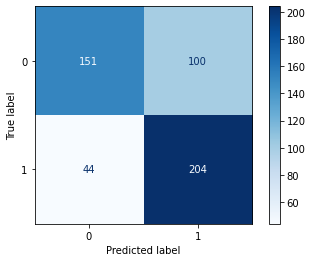

In [63]:
# View confusion matrix
plot_confusion_matrix(gs_tvec, X_test, y_test, cmap='Blues', values_format='d');

In [64]:
pred_proba = gs.predict_proba(X_test)[:,1]

In [65]:
gs_tvec.score(X_train, y_train)

0.8748326639892905

In [66]:
gs_tvec.score(X_test, y_test)

0.7114228456913828

In [67]:
# Calculate the specificity
print(tn / (tn + fp))

0.601593625498008


In [68]:
203/(203+95)

0.6812080536912751

In [69]:
# Calculate the sensitivity (recall)
tp / (tp + fn)

0.8225806451612904

In [70]:
# Calculate the precision
tp / (tp + fp)

0.6710526315789473

# Model - TFIDF and Niave Bayes - Add in Word Count!

In [71]:
#split text data intro training and test sets

X = df[['features', 'feature_length', 'feature_word_count']]
y = df['target']

# Model - TFIDF and Niave Bayes - Add in Sentiment!

In [101]:
X = df[['features', 'feature_length', 'feature_word_count', 'compound', 'neg', 'neu', 'pos']]
y = df['target']

In [102]:
X.shape

(1993, 7)

In [103]:
#check for balanced classes 

y.value_counts(normalize = True)

1    0.501254
0    0.498746
Name: target, dtype: float64

In [104]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=13, stratify = y)

In [105]:
# get baseline accuracy for training & test set

y_train.mean(), y_test.mean()

(0.501338688085676, 0.501002004008016)

In [106]:
tf = TfidfVectorizer(max_features = 4000, ngram_range = (1,2), stop_words = 'english', max_df = 0.9, min_df = 3)

In [107]:
X_train_tf = tf.fit_transform(X_train['features'])
X_test_tf = tf.transform(X_test['features'])

### Create new dataframse for traing and test set

In [108]:
df_X_train = pd.DataFrame(X_train_tf.todense(), columns=tf.get_feature_names())

In [109]:
df_X_test = pd.DataFrame(X_test_tf.todense(), columns = tf.get_feature_names())

#### Reset indices in all dataframes

In [110]:
df_X_train.reset_index(drop=True, inplace=True)

In [111]:
X_train.reset_index(drop=True, inplace=True)

In [112]:
df_X_test.reset_index(drop=True, inplace = True)

In [113]:
X_test.reset_index(drop=True, inplace=True)

#### Add sentiment scores back to text data. merge on index, drop 'text' column 

In [114]:
combined_X_train = pd.concat([df_X_train, X_train], axis =1)
combined_X_train.head(1)

,00,000,01,10,10 minut,10 year,100,1000,11,12,...,yuuzhan,yuuzhan vong,zahn,features,feature_length,feature_word_count,compound,neg,neu,pos
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,ha colin trevorrow public said anyth about tro...,354,62,0.5278,0.051,0.861,0.087


In [115]:
combined_X_test = pd.concat([df_X_test, X_test], axis = 1)

#### Drop Text Column

In [116]:
combined_X_train.drop(columns = 'features', inplace=True)

In [117]:
combined_X_test.drop(columns = 'features', inplace = True)

#### Checking all my data dimensions

In [118]:
combined_X_train.shape, combined_X_test.shape

((1494, 4006), (499, 4006))

In [119]:
y_train.shape, y_test.shape

((1494,), (499,))

### Model with gausian NB

In [451]:
from sklearn.naive_bayes import GaussianNB


In [452]:
nb = GaussianNB()

### Model with multinomial NB

In [91]:
nb = MultinomialNB()

In [92]:
nb.fit(combined_X_train, y_train)

MultinomialNB()

In [93]:
nb.score(combined_X_train, y_train), nb.score(combined_X_test, y_test)

(0.8179384203480589, 0.7414829659318637)

### Model with Decision Tree Classifier

In [120]:
from sklearn.tree import DecisionTreeClassifier

In [121]:
dt = DecisionTreeClassifier()
dt.fit(combined_X_train, y_train)

DecisionTreeClassifier()

In [122]:
dt.score(combined_X_train, y_train), dt.score(combined_X_test, y_test)

(0.9973226238286479, 0.6973947895791583)

In [123]:
params = [{'max_depth': [15, 17, 20],   #The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves     
            'max_features': [.65, .5, .35], #The number of features to consider when looking for the best split
           'class_weight': [None, 'balanced'],
          'min_samples_split' : [4, 5, 6]}]  #The minimum number of samples required to split an internal node (default is 2)

In [124]:
gs_dt = GridSearchCV(dt, param_grid = params, cv = 3)

In [125]:
gs_dt.fit(combined_X_train, y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid=[{'class_weight': [None, 'balanced'],
                          'max_depth': [15, 17, 20],
                          'max_features': [0.65, 0.5, 0.35],
                          'min_samples_split': [4, 5, 6]}])

In [126]:
gs_dt.score(combined_X_train, y_train)

0.8641231593038822

In [127]:
gs_dt.score(combined_X_test, y_test)

0.6993987975951904

In [485]:
gs_dt.best_params_

{'class_weight': 'balanced',
 'max_depth': 17,
 'max_features': 0.5,
 'min_samples_split': 4}

# Model with Random Forest, Extra Trees

In [128]:
rf = RandomForestClassifier()

et = ExtraTreesClassifier()

In [129]:
cross_val_score(rf, combined_X_train, y_train).mean()

0.7175214922223969

In [130]:
cross_val_score(et, combined_X_train, y_train).mean()

0.7382909474534803

In [139]:
rf = RandomForestClassifier(random_state=42)
params = {
    'n_estimators': [75, 100, 125], 
    'max_depth': [None, 3, 4],
    'max_features': ['auto', None]
}
gs_rf = GridSearchCV(rf, param_grid=params)
gs_rf.fit(combined_X_train, y_train)
print(gs_rf.best_score_)
gs_rf.best_params_

0.7255684496419833


{'max_depth': None, 'max_features': None, 'n_estimators': 100}

In [140]:
gs_rf.score(combined_X_train, y_train)

0.9973226238286479

In [141]:
gs_rf.score(combined_X_test, y_test)

0.7595190380761523

In [136]:
et = ExtraTreesClassifier(random_state=42)
params = {
    'n_estimators': [75, 100, 125], 
    'max_depth': [None, 3, 4],
    'max_features': ['auto', None]
}
gs_et = GridSearchCV(et, param_grid=params)
gs_et.fit(combined_X_train, y_train)
print(gs_et.best_score_)
gs_et.best_params_

0.7335996947318802


{'max_depth': None, 'max_features': 'auto', 'n_estimators': 125}

In [137]:
gs_et.score(combined_X_train, y_train)

0.9973226238286479

In [138]:
gs_et.score(combined_X_test, y_test)

0.7775551102204409

# Bagging

In [157]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.datasets import make_classification

from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier

In [144]:
bc = BaggingClassifier(DecisionTreeClassifier())

# Fits on a single test set
bc.fit(combined_X_train, y_train)
print('Train score: ', bc.score(combined_X_train, y_train))
print('Test score: ', bc.score(combined_X_test, y_test))

# Fits 4 models and takes the average test score
# CV - best estimate of performance on unseen data
#cv_scores = cross_val_score(bc, X, y, cv=4)
#print(cv_scores)
#print('CV score: ', cv_scores.mean())

Train score:  0.9799196787148594
Test score:  0.7294589178356713


In [145]:
# Forces it to be a weak classifier
ada = AdaBoostClassifier(DecisionTreeClassifier())

ada.fit(combined_X_train, y_train)
print('Train score: ', ada.score(combined_X_train, y_train))
print('Test score: ', ada.score(combined_X_test, y_test))

# Fits 4 models and takes the average test score
# CV - best estimate of performance on unseen data
#cv_scores = cross_val_score(ada, X, y, cv=4)
#print(cv_scores)
#print('CV score: ', cv_scores.mean())

Train score:  0.9973226238286479
Test score:  0.6653306613226453


In [146]:
ada = AdaBoostClassifier(base_estimator=DecisionTreeClassifier())

ada_params = {
    'n_estimators': [50, 100],
    'learning_rate': [.9, .1],
    'base_estimator__max_depth': [1, 2, 3]
}

gs = GridSearchCV(ada, param_grid=ada_params, cv=4)
gs.fit(combined_X_train, y_train)
print('GridSearchCV best score: ', gs.best_score_)
gs.best_params_

GridSearchCV best score:  0.7081869793981448


{'base_estimator__max_depth': 2, 'learning_rate': 0.1, 'n_estimators': 100}

In [147]:
print('Train score: ', gs.score(combined_X_train, y_train))
print('Test score: ', gs.score(combined_X_test, y_test))

Train score:  0.8447121820615796
Test score:  0.7655310621242485


In [173]:
imp_list = gs.best_estimator_.feature_importances_

In [174]:
col_names = combined_X_train.columns

In [177]:
imp = pd.DataFrame(imp_list, index=col_names, columns=['feat imp'])

In [183]:
imp.sort_values('feat imp', ascending = False).head(25)

,feat imp
sequel,0.055955
disney,0.049553
compound,0.048830
neg,0.037702
better,0.035124
finn,0.032943
stori,0.030935
star,0.029606
war,0.028038
tcw,0.026624


In [149]:
gboost = GradientBoostingClassifier()
gboost_params = {
    'max_depth': [2,3,4],
    'n_estimators': [100, 125, 150],
    'learning_rate': [.08, .1, .12]
}
gb_gs = GridSearchCV(gboost, param_grid=gboost_params, cv=4)
gb_gs.fit(combined_X_train, y_train)
print(gb_gs.best_score_)
gb_gs.best_params_

0.7342923398947685


{'learning_rate': 0.12, 'max_depth': 4, 'n_estimators': 125}

In [150]:
print('Train score: ', gb_gs.score(combined_X_train, y_train))
print('Test score: ', gb_gs.score(combined_X_test, y_test))

Train score:  0.9377510040160643
Test score:  0.7755511022044088


In [167]:
vote = VotingClassifier([
    ('tree', ExtraTreesClassifier()),
    ('ada', AdaBoostClassifier()),
    ('gb', GradientBoostingClassifier())
])
vote_params = {
    'tree__max_depth': [None],
    'tree__max_features': ['auto'],
    'tree__n_estimators': [125],
    #'ada__base_estimator__max_depth': [2],
    'ada__learning_rate': [0.1],
    'ada__n_estimators': [100],
    'gb__learning_rate': [.12],
    'gb__max_depth': [4],
    'gb__n_estimators': [125]
}
gs_vote = GridSearchCV(vote, param_grid=vote_params, cv=3)
gs_vote.fit(combined_X_train, y_train)
print(gs_vote.best_score_)
gs_vote.best_params_

0.714859437751004


{'ada__learning_rate': 0.1,
 'ada__n_estimators': 100,
 'gb__learning_rate': 0.12,
 'gb__max_depth': 4,
 'gb__n_estimators': 125,
 'tree__max_depth': None,
 'tree__max_features': 'auto',
 'tree__n_estimators': 125}

In [169]:
print('Train score: ', gs_vote.score(combined_X_train, y_train))
print('Test score: ', gs_vote.score(combined_X_test, y_test))

Train score:  0.9464524765729585
Test score:  0.781563126252505


In [184]:
# Get predictions
preds = gs_vote.predict(combined_X_test)

# Save confusion matrix values
tn, fp, fn, tp = confusion_matrix(y_test, preds).ravel()


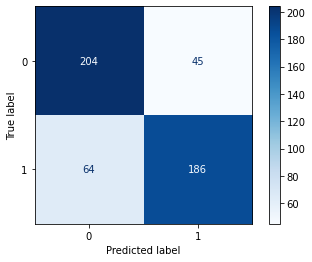

In [186]:
# View confusion matrix
plot_confusion_matrix(gs_vote, combined_X_test, y_test, cmap='Blues', values_format='d');

In [187]:
# Calculate the specificity
tn / (tn + fp) # there are 5 real emails that got tagged as spam - that's bad! can we bring this to 0?

0.8192771084337349

# Explore misclassified text

In [225]:
pred_df = X_test.copy()


In [ ]:
y_np = y_test.to_numpy()

In [235]:
pred_df['target'] = y_np

In [227]:
pred_df['predictions'] = preds

In [236]:
pred_df.head()

,features,feature_length,feature_word_count,compound,neg,neu,pos,target,predictions
0,"regardless of whether it wa necessary, what gr...",121,14,0.0000,0.000,1.00,0.000,1,0
1,incred 2 suffer from veri similar sequel probl...,2999,534,0.9923,0.084,0.77,0.147,1,1
2,perhap we treat vector prime too harshli,44,7,0.0000,0.000,1.00,0.000,1,0
3,hmmmmmm,8,1,0.0000,0.000,1.00,0.000,0,0
4,complet canon timelin of the sequel era,42,7,0.0000,0.000,1.00,0.000,0,1


In [237]:
false_pos = pred_df[(pred_df['target'] == 0) & (pred_df['predictions'] == 1)]

In [238]:
false_pos.head()

,features,feature_length,feature_word_count,compound,neg,neu,pos,target,predictions
4,complet canon timelin of the sequel era,42,7,0.0000,0.000,1.000,0.000,0,1
9,"couldn’t age more, mark.",26,4,0.0000,0.000,1.000,0.000,0,1
24,"don’t know if thi is allow here, so pleas take...",6477,1082,-0.9873,0.089,0.849,0.062,0,1
31,friendli remind,18,2,0.4939,0.000,0.238,0.762,0,1
37,comparison between the (re)introduct of kylo' ...,132,20,0.0000,0.000,1.000,0.000,0,1


In [239]:
false_neg = pred_df[(pred_df['target'] == 1) & (pred_df['predictions'] == 0)]

In [240]:
false_neg.head()

,features,feature_length,feature_word_count,compound,neg,neu,pos,target,predictions
0,"regardless of whether it wa necessary, what gr...",121,14,0.0000,0.000,1.000,0.000,1,0
2,perhap we treat vector prime too harshli,44,7,0.0000,0.000,1.000,0.000,1,0
13,ahm best share some black jedi love today in s...,76,13,0.9538,0.000,0.316,0.684,1,0
19,won’t hate it if they do it but still,38,9,-0.3291,0.227,0.773,0.000,1,0
23,somebodi pleas explain whi laser in space now ...,78,12,0.3182,0.000,0.827,0.173,1,0


In [191]:
type(y_test)

pandas.core.series.Series

In [192]:
type(X_test)

pandas.core.frame.DataFrame

In [193]:
pred_df = X_test.to_frame().join(y_test)

AttributeError: 'DataFrame' object has no attribute 'to_frame'

In [82]:

pred_df['predictions'] = preds


In [83]:
pred_df.head()

,features,target,predictions
164,Can someone explain the situation at the end o...,1,1
992,“Holdo didn’t tell Poe the plan because she wa...,1,1
1626,I broke my Return Of The Jedi pint glass this ...,0,0
1874,Who Has the Most Raw Power in The Force\n\n[Vi...,0,0
1245,Which Star Wars movie has the best music?\n\n[...,0,0


In [87]:
false_pos = pred_df[(pred_df['target'] == 0) & (pred_df['predictions'] == 1)]

In [88]:
false_pos.to_csv('./data/false_pos.csv')

# Visualize top TFIDF words

In [68]:
def top_tfidf_feats(row, features, top_n=25):
    ''' Get top n tfidf values in row and return them with their corresponding feature names.'''
    topn_ids = np.argsort(row)[::-1][:top_n]
    top_feats = [(features[i], row[i]) for i in topn_ids]
    df = pd.DataFrame(top_feats)
    df.columns = ['feature', 'tfidf']
    return df

In [69]:
def top_mean_feats(Xtr, features, grp_ids=None, min_tfidf=0.1, top_n=25):
    ''' Return the top n features that on average are most important amongst documents in rows
        indentified by indices in grp_ids. '''
    if grp_ids:
        D = Xtr[grp_ids].toarray()
    else:
        D = Xtr.toarray()

    D[D < min_tfidf] = 0
    tfidf_means = np.mean(D, axis=0)
    return top_tfidf_feats(tfidf_means, features, top_n)

In [70]:
def top_feats_by_class(Xtr, y, features, min_tfidf=0.1, top_n=25):
    ''' Return a list of dfs, where each df holds top_n features and their mean tfidf value
        calculated across documents with the same class label. '''
    dfs = []
    labels = np.unique(y)
    for label in labels:
        ids = np.where(y==label)
        feats_df = top_mean_feats(Xtr, features, ids, min_tfidf=min_tfidf, top_n=top_n)
        feats_df.label = label
        dfs.append(feats_df)
    return dfs

In [71]:
features = tf.get_feature_names()

In [72]:
dfs = top_feats_by_class(X_train_tf, y_train, features)

In [73]:
def plot_tfidf_classfeats_h(dfs):
    ''' Plot the data frames returned by the function plot_tfidf_classfeats(). '''
    fig = plt.figure(figsize=(12, 9), facecolor="w")
    x = np.arange(len(dfs[0]))
    for i, df in enumerate(dfs):
        ax = fig.add_subplot(1, len(dfs), i+1)
        ax.spines["top"].set_visible(False)
        ax.spines["right"].set_visible(False)
        ax.set_frame_on(False)
        ax.get_xaxis().tick_bottom()
        ax.get_yaxis().tick_left()
        ax.set_xlabel("Mean Tf-Idf Score", labelpad=16, fontsize=14)
        ax.set_title("label = " + str(df.label), fontsize=16)
        ax.ticklabel_format(axis='x', style='sci', scilimits=(-2,2))
        ax.barh(x, df.tfidf, align='center', color='#3F5D7D')
        ax.set_yticks(x)
        ax.set_ylim([-1, x[-1]+1])
        yticks = ax.set_yticklabels(df.feature)
        plt.subplots_adjust(bottom=0.09, right=0.97, left=0.15, top=0.95, wspace=0.52)
    plt.show()

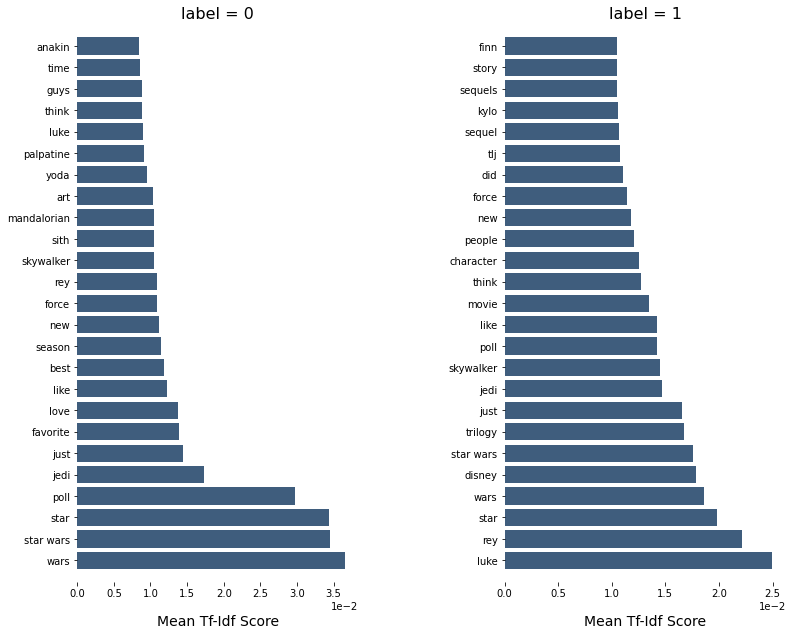

In [74]:
plot_tfidf_classfeats_h(dfs)